In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from PCA_Kmeans import *
import plotinpy as pnp
import time

In [2]:
name = "B303_Trim"
vid,vid_gray,vid_gf = vid2Darray2("00_"+name+".mp4")
rvid,rvid_gray,rvid_gf = res_vid(vid,1.5)

In [3]:
#start=time.time()
#eVal,eVec,M = PCA(rvid_gf)
#print("time :", time.time() - start,"s")

In [4]:
#np.savetxt('00_'+name+'_eVal.txt', eVal[0:20], delimiter=',')
#np.savetxt('00_'+name+'_eVec.txt', eVec[:,0:20], delimiter=',')
#np.savetxt('00_'+name+'_M.txt', M, delimiter=',')

In [5]:
eVal = np.genfromtxt('00_'+name+'_eVal.txt', delimiter=',')
eVec = np.genfromtxt('00_'+name+'_eVec.txt', delimiter=',')
M = np.genfromtxt('00_'+name+'_M.txt', delimiter=',')

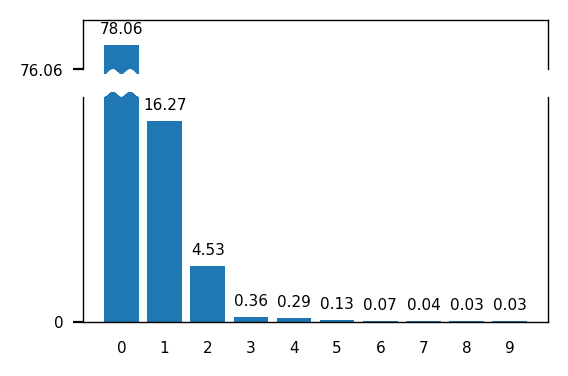

In [6]:
y=eVal[0:10]/np.sum(eVal)*100
y1=y
for i in np.arange(len(y)):
    y1[i] = round(y[i],2)
plt.figure(figsize=[3,2],dpi=200)
plt.rc('font', size=5.5)
plt.rc('lines', linewidth=1)
plt.rc('axes', linewidth=0.5)
pnp.plot_bars_with_breaks(
    list(y1),
    [(y1[1]+2, y1[0]-2)],
    style="~~",
#    break_args={"hatch": '///'}
    )
#plt.show()
plt.savefig("01_"+name+"_eVal.png")

In [7]:
component_n = np.arange(10)+1
variance = y1
variance_csv = np.zeros((len(component_n),2))
variance_csv[:,0]=component_n;variance_csv[:,1]=variance
np.savetxt('10_'+name+'_variance.csv', variance_csv, delimiter=',')

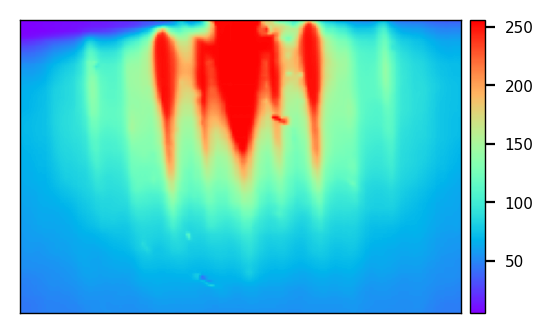

In [8]:
frame_size=rvid_gray.shape[1:3]
plt.figure(figsize=[3,2],dpi=200)
plt.imshow(M.reshape(frame_size),cmap="rainbow")
plt.colorbar(fraction=0.0315, pad=0.02)
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
#plt.show()
plt.savefig("02_"+name+"_Mean.png")

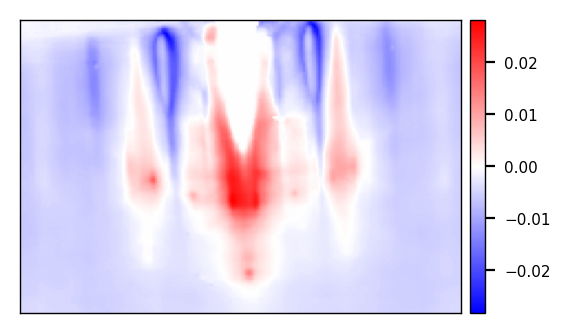

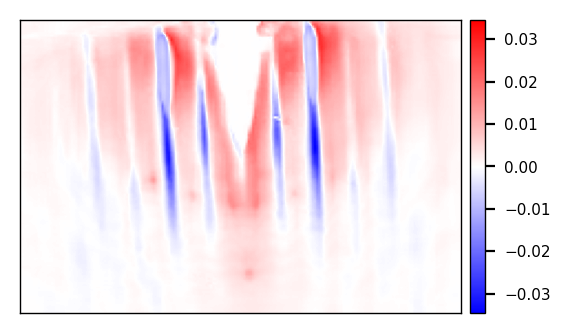

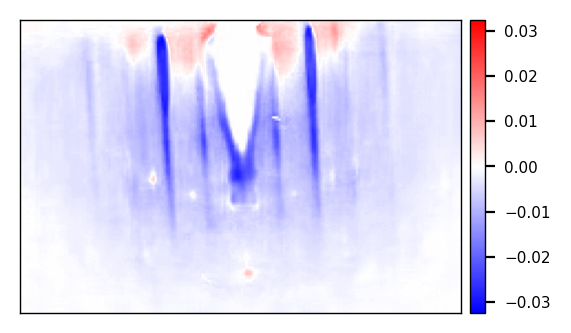

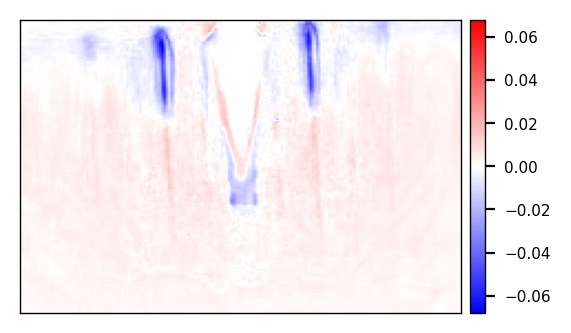

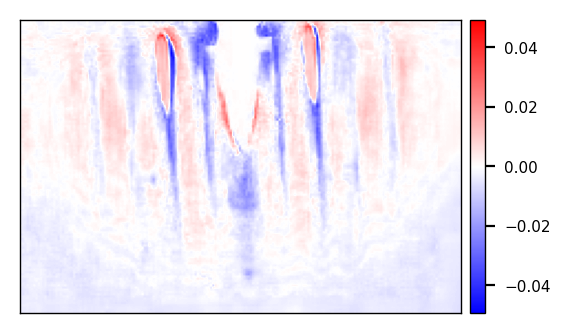

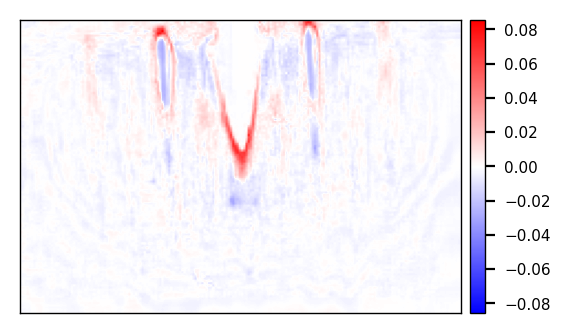

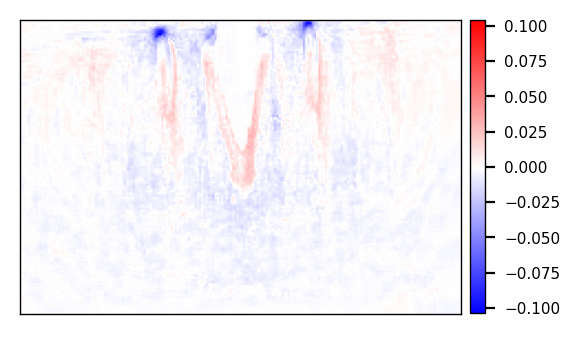

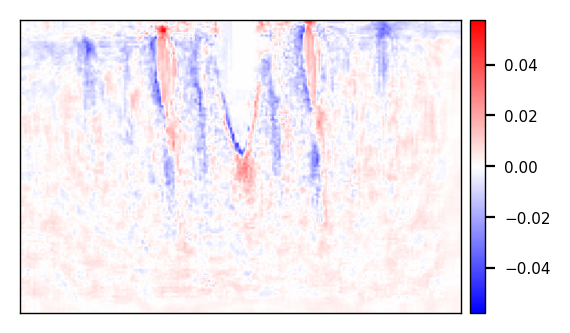

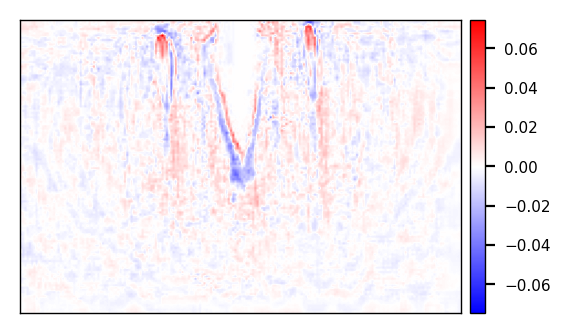

In [9]:
flip = [0,0,1,1,0,0,0,0,0]
for i in np.arange(9):
    clim = center_image(eVec[:,i])
    plt.figure(figsize=[3,2],dpi=200)
    if flip[i]==True:
        plt.imshow(-eVec[:,i].reshape(frame_size),cmap="bwr")
    else:
        plt.imshow(eVec[:,i].reshape(frame_size),cmap="bwr")
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
    plt.clim(-clim,clim)
    plt.colorbar(fraction=0.0315, pad=0.02)
#    plt.show()
    plt.savefig("03_"+name+"_Comp"+str(i+1)+".png")

In [10]:
t1,f = load(1,M,eVec,rvid_gf)
t2,f = load(2,M,eVec,rvid_gf)
t3,f = load(3,M,eVec,rvid_gf)
t4,f = load(4,M,eVec,rvid_gf)
t5,f = load(5,M,eVec,rvid_gf)
t6,f = load(6,M,eVec,rvid_gf)
t=[]
t.append(t1);t.append(t2);t.append(t3);t.append(t4);t.append(t5);t.append(t6)
t = np.array(t)
t = t.transpose()
for i in np.arange(6):
    if flip[i]==True:
        t[:,i] = -t[:,i]

In [11]:
frame_n = len(t1)
time_n = f/60
score_csv = np.zeros((frame_n,7))
score_csv[:,0]=time_n;score_csv[:,1:7]=t
np.savetxt('10_'+name+'_score.csv', score_csv, delimiter=',')

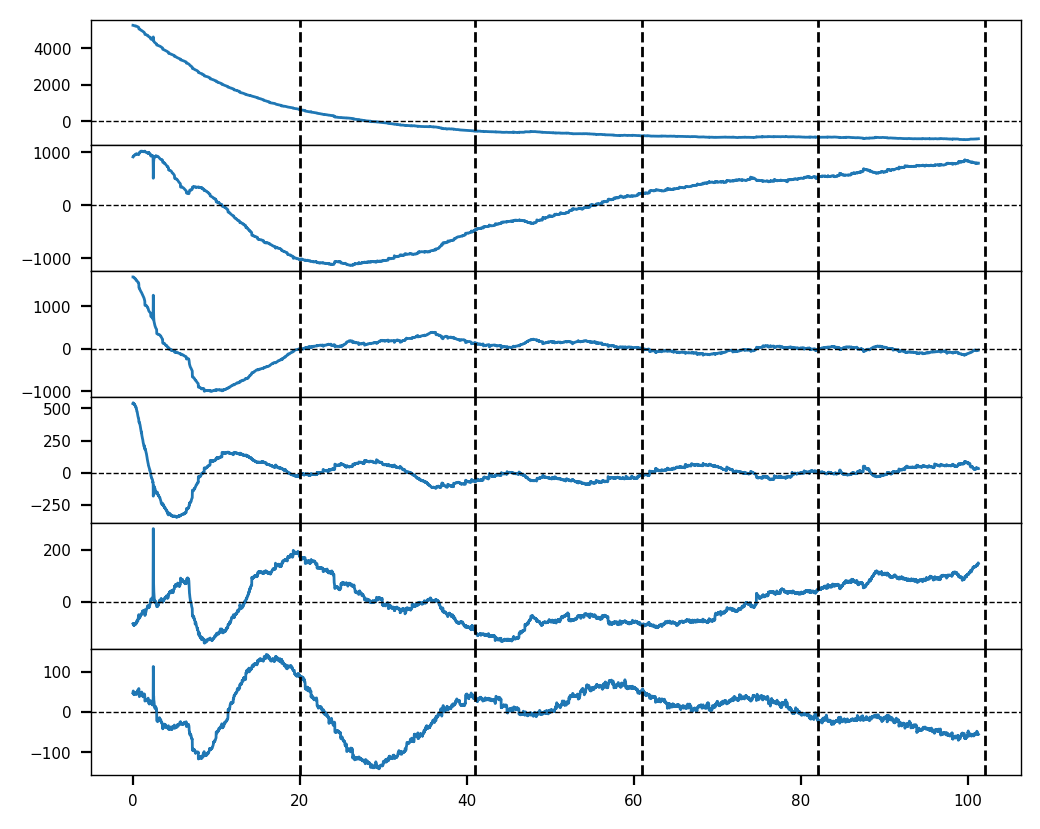

In [12]:
time = f/60
fig = plt.figure(figsize=(6,5),dpi=200)
gs = fig.add_gridspec(6, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)
for i in np.arange(6):
    axs[i].plot(time, t[:,i])

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()
    ax.axhline(0,linestyle='--', color='k',linewidth=0.5)
    ax.axvline(20,linestyle='--', color='k',linewidth=1)
    ax.axvline(41,linestyle='--', color='k',linewidth=1)
    ax.axvline(61,linestyle='--', color='k',linewidth=1)
    ax.axvline(82,linestyle='--', color='k',linewidth=1)
    ax.axvline(102,linestyle='--', color='k',linewidth=1)
#plt.show()
plt.savefig("04_"+name+"_score.png")

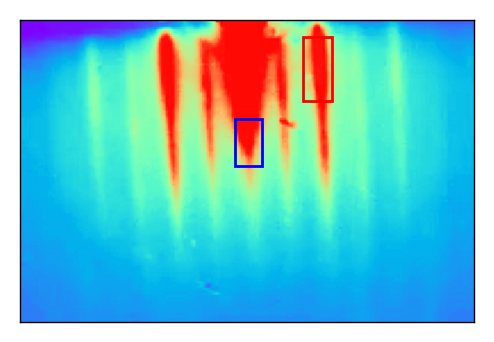

In [13]:
fn,nrow,ncol = rvid_gray.shape
sn = 1800

sv1,sh1,av1,ah1=43,94,21,12
sv2,sh2,av2,ah2=7,124,28,13

fig, ax = plt.subplots(figsize=(3,2),dpi=200)
ax.imshow(rvid_gray[sn],cmap="rainbow")
rect1 = patches.Rectangle((sh1, sv1), ah1, av1, linewidth=1, edgecolor='BLUE', facecolor='none')
rect2 = patches.Rectangle((sh2, sv2), ah2, av2, linewidth=1, edgecolor='RED', facecolor='none')

ax.add_patch(rect1)
ax.add_patch(rect2)

plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
#plt.show()
plt.savefig("05_"+name+"_cut.png")

In [14]:
Output = rvid_gray
cut1 = Output[:,sv1:sv1+av1,sh1:sh1+ah1]
cut2 = Output[:,sv2:sv2+av2,sh2:sh2+ah2]

yy1=[]
yy2=[]


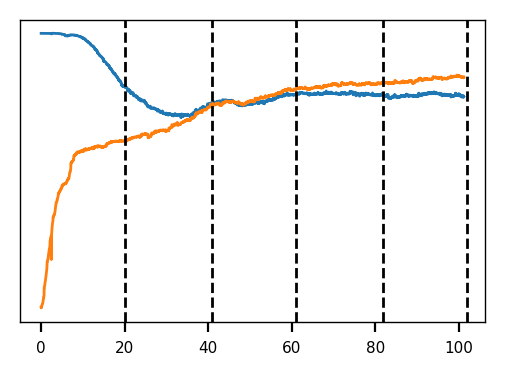

In [15]:
x = np.arange(fn)/60
y1 = np.zeros(fn)
y2 = np.zeros(fn)
yy1.append(x);yy2.append(x)

for i in np.arange(fn):
    y1[i] = np.sum(cut1[i])/(ah1*av1)
    y2[i] = np.sum(cut2[i])/(ah2*av2)

yy1.append(y1);yy2.append(y2)
plt.figure(figsize=[3,2],dpi=200)
plt.plot(x,y1)
plt.plot(x,y2)
plt.axvline(20,linestyle='--', color='k',linewidth=1)
plt.axvline(41,linestyle='--', color='k',linewidth=1)
plt.axvline(61,linestyle='--', color='k',linewidth=1)
plt.axvline(82,linestyle='--', color='k',linewidth=1)
plt.axvline(102,linestyle='--', color='k',linewidth=1)

plt.tick_params(axis='both', which='both', right=False, left=False, labelleft=False)
#plt.show()
plt.savefig("06_"+name+"-0_cutintensity.png")

In [16]:
comp_n = np.array([1])
shape_2d = rvid_gf.shape
PCD = rvid_gf
for i in comp_n:
    PCD -= pcd(rvid_gf,eVec,i)

Output = np.zeros((fn, nrow, ncol))
for i in np.arange(fn):
    Output[i,:,:] = PCD[i].reshape(nrow,ncol)

cut1 = Output[:,sv1:sv1+av1,sh1:sh1+ah1]
cut2 = Output[:,sv2:sv2+av2,sh2:sh2+ah2]

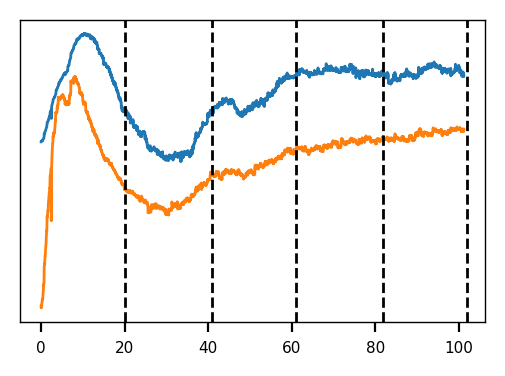

In [17]:
x = np.arange(fn)/60
y1 = np.zeros(fn)
y2 = np.zeros(fn)

for i in np.arange(fn):
    y1[i] = np.sum(cut1[i])/(ah1*av1)
    y2[i] = np.sum(cut2[i])/(ah2*av2)
yy1.append(y1);yy2.append(y2)

plt.figure(figsize=[3,2],dpi=200)
plt.plot(x,y1)
plt.plot(x,y2)
plt.axvline(20,linestyle='--', color='k',linewidth=1)
plt.axvline(41,linestyle='--', color='k',linewidth=1)
plt.axvline(61,linestyle='--', color='k',linewidth=1)
plt.axvline(82,linestyle='--', color='k',linewidth=1)
plt.axvline(102,linestyle='--', color='k',linewidth=1)

plt.tick_params(axis='both', which='both', right=False, left=False, labelleft=False)
#plt.show()
plt.savefig("06_"+name+"-01_cutintensity.png")

In [18]:
comp_n = np.array([1,2])
shape_2d = rvid_gf.shape
PCD = rvid_gf
for i in comp_n:
    PCD -= pcd(rvid_gf,eVec,i)

Output = np.zeros((fn, nrow, ncol))
for i in np.arange(fn):
    Output[i,:,:] = PCD[i].reshape(nrow,ncol)

cut1 = Output[:,sv1:sv1+av1,sh1:sh1+ah1]
cut2 = Output[:,sv2:sv2+av2,sh2:sh2+ah2]

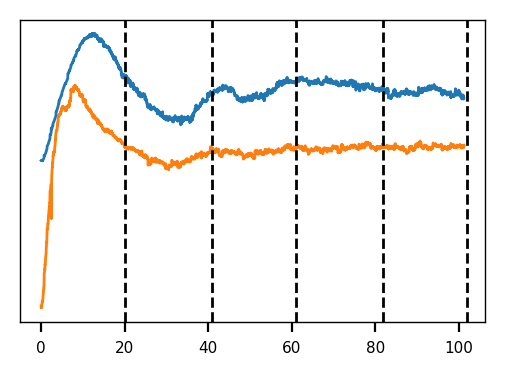

In [19]:
x = np.arange(fn)/60
y1 = np.zeros(fn)
y2 = np.zeros(fn)

for i in np.arange(fn):
    y1[i] = np.sum(cut1[i])/(ah1*av1)
    y2[i] = np.sum(cut2[i])/(ah2*av2)
yy1.append(y1);yy2.append(y2)
    
plt.figure(figsize=[3,2],dpi=200)
plt.plot(x,y1)
plt.plot(x,y2)
plt.axvline(20,linestyle='--', color='k',linewidth=1)
plt.axvline(41,linestyle='--', color='k',linewidth=1)
plt.axvline(61,linestyle='--', color='k',linewidth=1)
plt.axvline(82,linestyle='--', color='k',linewidth=1)
plt.axvline(102,linestyle='--', color='k',linewidth=1)

plt.tick_params(axis='both', which='both', right=False, left=False, labelleft=False)
#plt.show()
plt.savefig("06_"+name+"-012_cutintensity.png")

In [20]:
comp_n = np.array([1,2,3])
shape_2d = rvid_gf.shape
PCD = rvid_gf
for i in comp_n:
    PCD -= pcd(rvid_gf,eVec,i)

Output = np.zeros((fn, nrow, ncol))
for i in np.arange(fn):
    Output[i,:,:] = PCD[i].reshape(nrow,ncol)

cut1 = Output[:,sv1:sv1+av1,sh1:sh1+ah1]
cut2 = Output[:,sv2:sv2+av2,sh2:sh2+ah2]

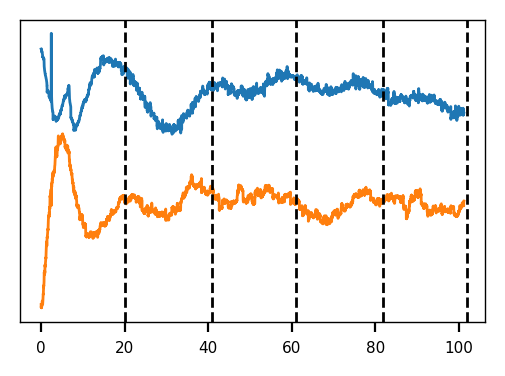

In [21]:
x = np.arange(fn)/60
y1 = np.zeros(fn)
y2 = np.zeros(fn)

for i in np.arange(fn):
    y1[i] = np.sum(cut1[i])/(ah1*av1)
    y2[i] = np.sum(cut2[i])/(ah2*av2)
yy1.append(y1);yy2.append(y2)
    
plt.figure(figsize=[3,2],dpi=200)
plt.plot(x,y1)
plt.plot(x,y2)
plt.axvline(20,linestyle='--', color='k',linewidth=1)
plt.axvline(41,linestyle='--', color='k',linewidth=1)
plt.axvline(61,linestyle='--', color='k',linewidth=1)
plt.axvline(82,linestyle='--', color='k',linewidth=1)
plt.axvline(102,linestyle='--', color='k',linewidth=1)

plt.tick_params(axis='both', which='both', right=False, left=False, labelleft=False)
#plt.show()
plt.savefig("06_"+name+"-0123_cutintensity.png")

In [22]:
comp_n = np.array([1,2,3,4])
shape_2d = rvid_gf.shape
PCD = rvid_gf
for i in comp_n:
    PCD -= pcd(rvid_gf,eVec,i)

Output = np.zeros((fn, nrow, ncol))
for i in np.arange(fn):
    Output[i,:,:] = PCD[i].reshape(nrow,ncol)

cut1 = Output[:,sv1:sv1+av1,sh1:sh1+ah1]
cut2 = Output[:,sv2:sv2+av2,sh2:sh2+ah2]

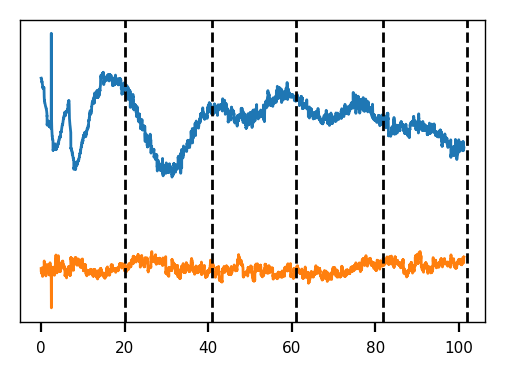

In [23]:
x = np.arange(fn)/60
y1 = np.zeros(fn)
y2 = np.zeros(fn)

for i in np.arange(fn):
    y1[i] = np.sum(cut1[i])/(ah1*av1)
    y2[i] = np.sum(cut2[i])/(ah2*av2)
yy1.append(y1);yy2.append(y2)
    
plt.figure(figsize=[3,2],dpi=200)
plt.plot(x,y1)
plt.plot(x,y2)
plt.axvline(20,linestyle='--', color='k',linewidth=1)
plt.axvline(41,linestyle='--', color='k',linewidth=1)
plt.axvline(61,linestyle='--', color='k',linewidth=1)
plt.axvline(82,linestyle='--', color='k',linewidth=1)
plt.axvline(102,linestyle='--', color='k',linewidth=1)

plt.tick_params(axis='both', which='both', right=False, left=False, labelleft=False)
#plt.show()
plt.savefig("06_"+name+"-01234_cutintensity.png")

In [24]:
comp_n = np.array([1,2,3,4,5])
shape_2d = rvid_gf.shape
PCD = rvid_gf
for i in comp_n:
    PCD -= pcd(rvid_gf,eVec,i)

Output = np.zeros((fn, nrow, ncol))
for i in np.arange(fn):
    Output[i,:,:] = PCD[i].reshape(nrow,ncol)

cut1 = Output[:,sv1:sv1+av1,sh1:sh1+ah1]
cut2 = Output[:,sv2:sv2+av2,sh2:sh2+ah2]

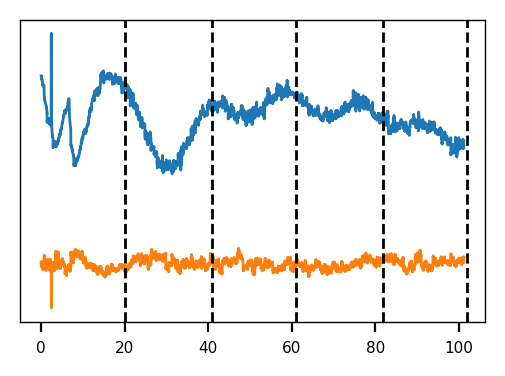

In [25]:
x = np.arange(fn)/60
y1 = np.zeros(fn)
y2 = np.zeros(fn)

for i in np.arange(fn):
    y1[i] = np.sum(cut1[i])/(ah1*av1)
    y2[i] = np.sum(cut2[i])/(ah2*av2)
yy1.append(y1);yy2.append(y2)
    
plt.figure(figsize=[3,2],dpi=200)
plt.plot(x,y1)
plt.plot(x,y2)
plt.axvline(20,linestyle='--', color='k',linewidth=1)
plt.axvline(41,linestyle='--', color='k',linewidth=1)
plt.axvline(61,linestyle='--', color='k',linewidth=1)
plt.axvline(82,linestyle='--', color='k',linewidth=1)
plt.axvline(102,linestyle='--', color='k',linewidth=1)

plt.tick_params(axis='both', which='both', right=False, left=False, labelleft=False)
#plt.show()
plt.savefig("06_"+name+"-012345_cutintensity.png")

In [26]:
yyy1 = np.array(yy1).transpose()
yyy2 = np.array(yy2).transpose()
np.savetxt('10_'+name+'_cutintensity_01.csv', yyy1, delimiter=',')
np.savetxt('10_'+name+'_cutintensity_02.csv', yyy2, delimiter=',')